# Imports

In [149]:
from pickle import load

from IPython.core.display_functions import display
from matplotlib import pyplot as plt
from numpy import array
from pandas import DataFrame
from pandas.plotting import table
from seaborn import heatmap

# Load models from file

In [150]:
file_names = [
    'randomforest',
    'kmeans',
    'pca',
    'gmm',
    'svm',
    'adaboost',
    'knn',
]

models = []
for model_name in file_names:
    with open(f'./out/models/{model_name}.pkl', 'rb') as file:
        model = load(file)
        models.append(model)

# Get result metrics

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elaps

,Random Forest Classifier Scores
F1-Score,0.985773
Accuracy,0.989435


,K-mean Anomaly Detection Scores
F1-Score,0.542313
Accuracy,0.372037


,PCA Anomaly Detection Scores
F1-Score,0.749150
Accuracy,0.783395


,GMM Anomaly Detection Scores
F1-Score,0.542313
Accuracy,0.372037


,SVM Classifier Scores
F1-Score,0.937603
Accuracy,0.954906


,AdaBoost Classifier Scores
F1-Score,0.944019
Accuracy,0.959287


,K-nearest Neighbour Classifier Scores
F1-Score,0.935925
Accuracy,0.952948


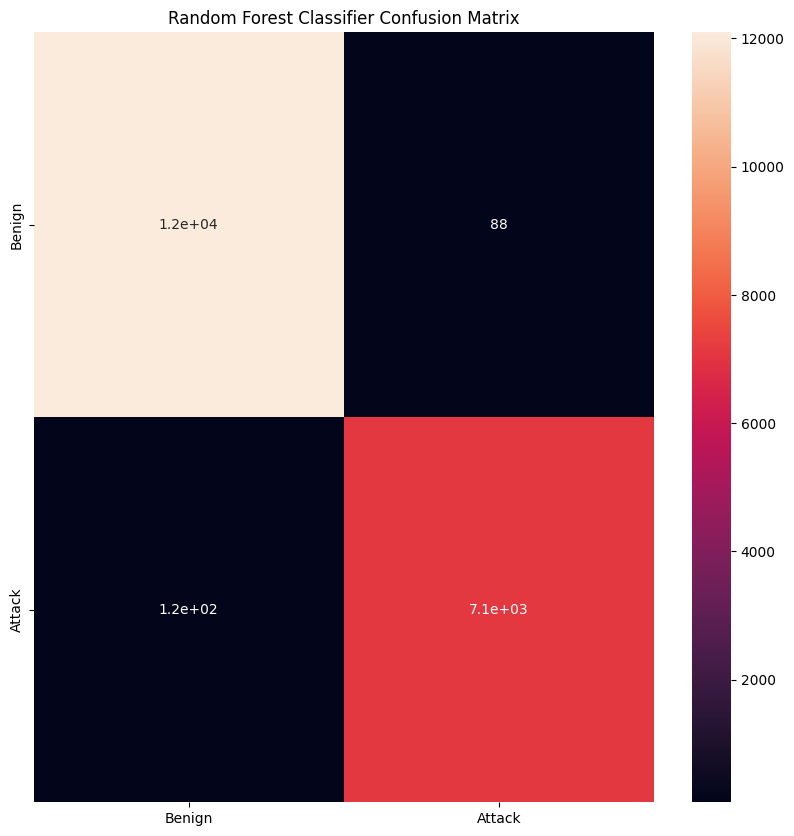

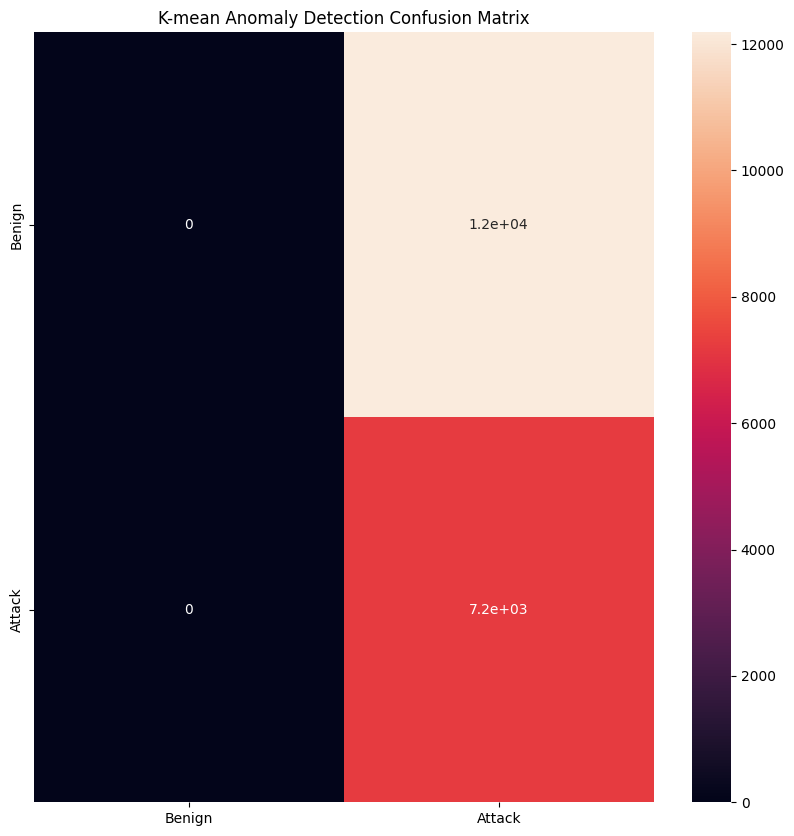

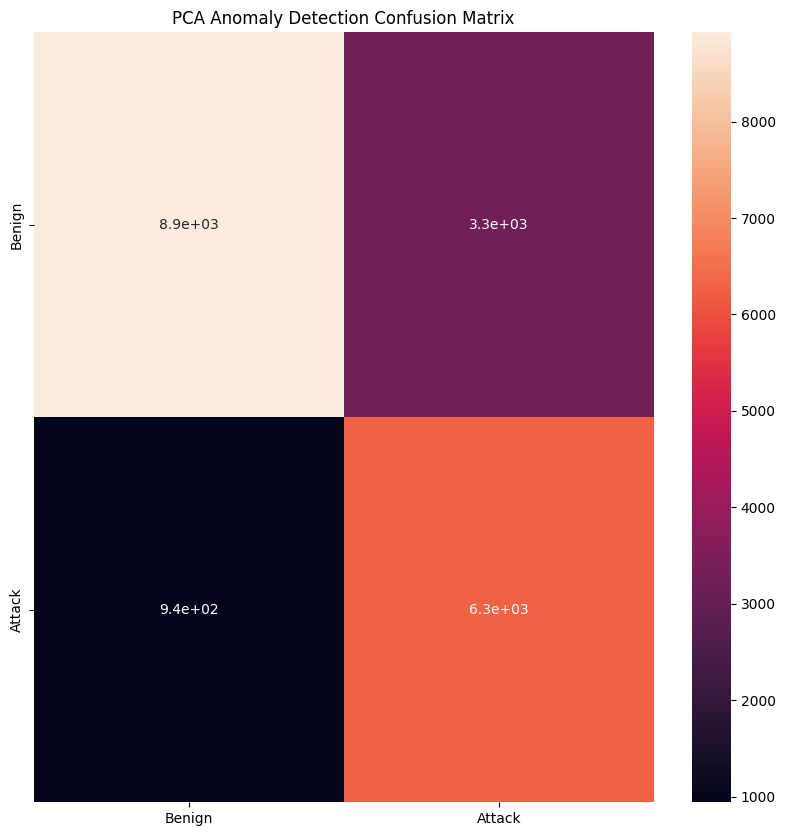

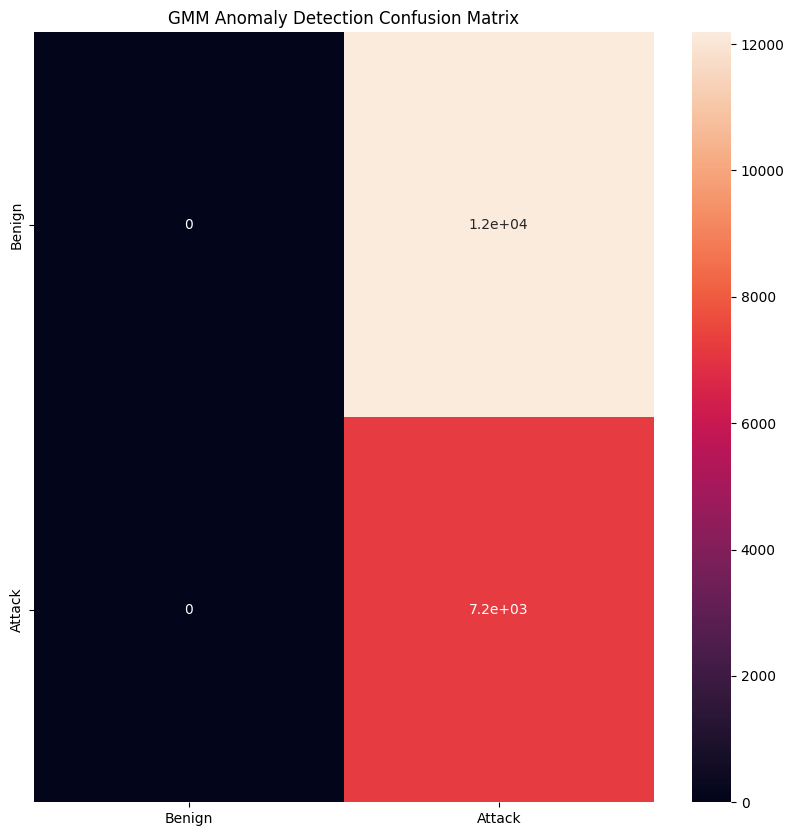

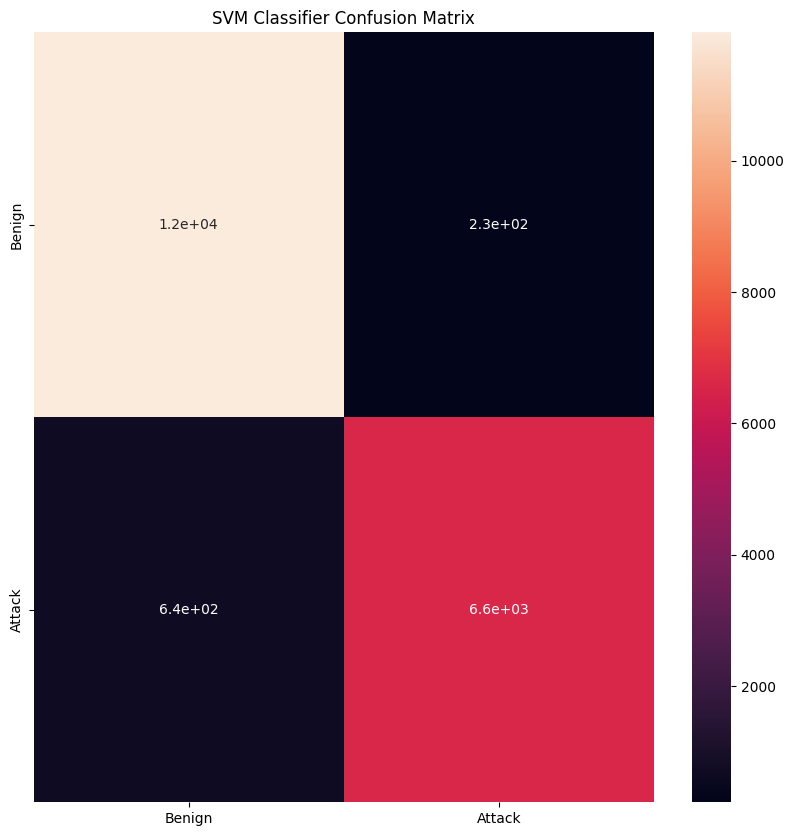

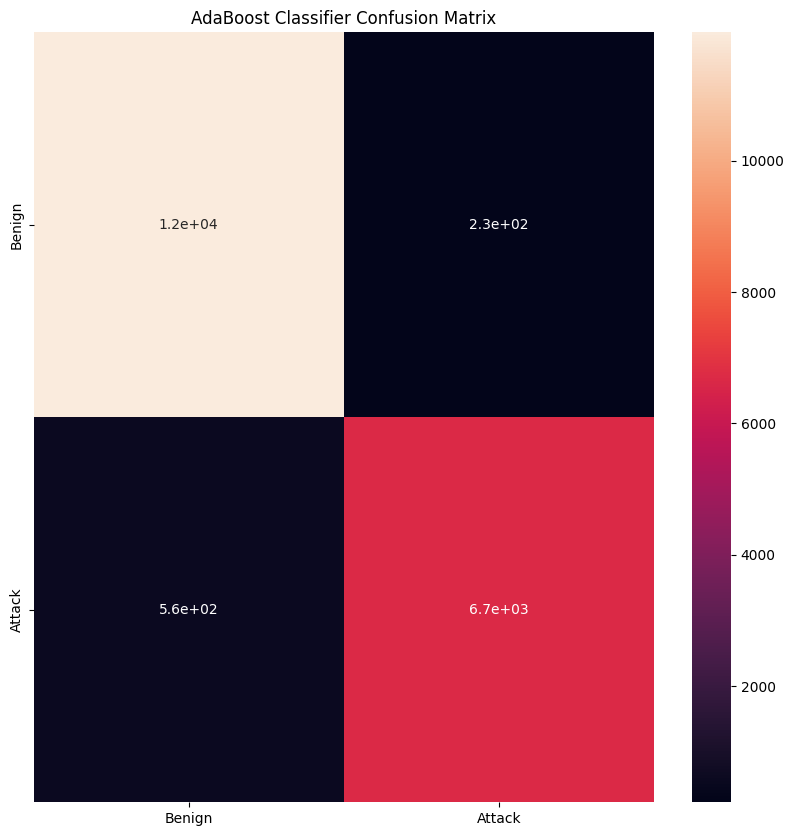

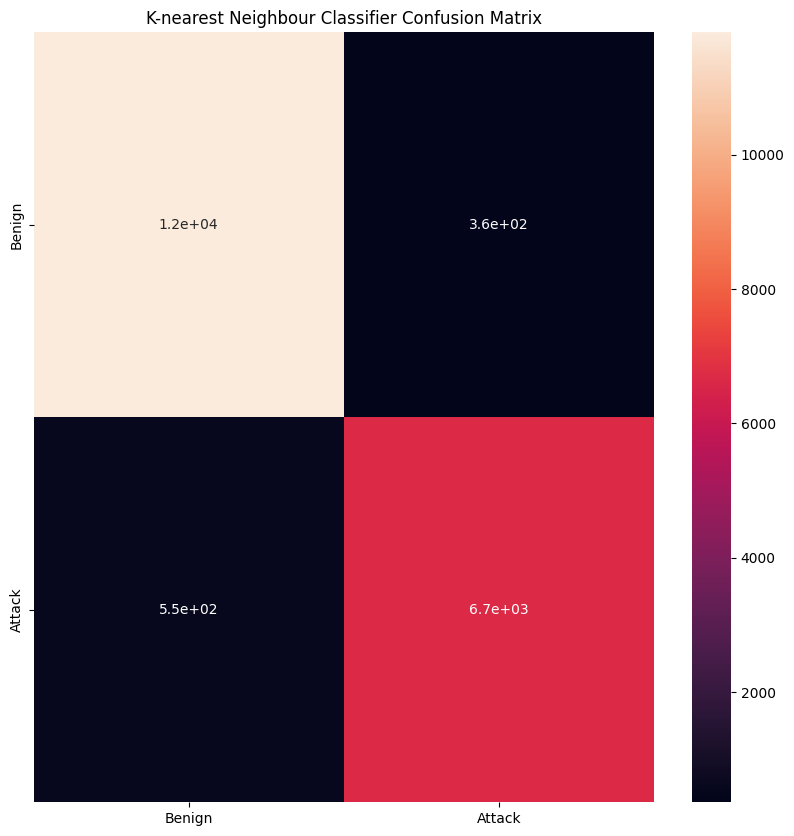

In [151]:
model_names = [
    'Random Forest Classifier',
    'K-mean Anomaly Detection',
    'PCA Anomaly Detection',
    'GMM Anomaly Detection',
    'SVM Classifier',
    'AdaBoost Classifier',
    'K-nearest Neighbour Classifier',
]

for model, name in zip(models, model_names):
    confusion, f_score, accuracy = model.get_metrics()
    confusion_matrix = DataFrame(confusion, index=['Benign', 'Attack'], columns=['Benign', 'Attack'])
    scores = DataFrame([f_score, accuracy], index=['F1-Score', 'Accuracy'], columns=[f'{name} Scores'])

    plt.figure(figsize=(10,10))
    plt.title(f'{name} Confusion Matrix')
    heatmap(confusion_matrix, annot=True)
    plt.savefig(f'./out/figures/{name} confusion matrix.png')

    display(scores)